In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("gradesANOVA.xlsx")
df = df.dropna()

Saving gradesANOVA.xlsx to gradesANOVA.xlsx


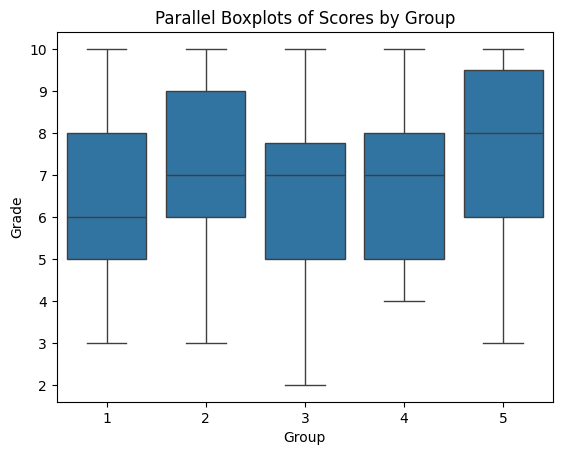

In [6]:
sns.boxplot(x='group', y='grade', data=df)
plt.title('Parallel Boxplots of Scores by Group')
plt.xlabel('Group')
plt.ylabel('Grade')
plt.show()

In [8]:
groups = [group['grade'].values for name, group in df.groupby('group')]
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 1.1459093099503188
P-value: 0.33809843344763385


Result: P-value (0.338) is greater than the significance level (0.05), we fail to reject the null hypothesis. This means there is no significant difference in the mean grades among the groups.

In [16]:
model = ols('grade ~ C(group) + C(Q("gender (0=male,1=female)")) + C(group):C(Q("gender (0=male,1=female)"))', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                               sum_sq     df         F  \
C(group)                                    17.355507    4.0  1.061173   
C(Q("gender (0=male,1=female)"))                  NaN    1.0       NaN   
C(group):C(Q("gender (0=male,1=female)"))   12.279092    4.0  0.750784   
Residual                                   498.828215  122.0       NaN   

                                             PR(>F)  
C(group)                                   0.368266  
C(Q("gender (0=male,1=female)"))                NaN  
C(group):C(Q("gender (0=male,1=female)"))  0.523934  
Residual                                        NaN  


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '


Group, gender and the nteraction (group - gender) have p-values greater than 0.05.This shows that neither group, gender, nor their interaction has a significant effect on the grades.